In [1]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# 2. Extract Dataset
import zipfile
import os

zip_path = "/content/drive/MyDrive/ml_pr.zip"  # 🔁 Change path if needed
extract_path = "/content/dataset2"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted!")


✅ Dataset extracted!


In [3]:
# 3. Check Folders
print("Folders inside dataset:")
print(os.listdir("/content/dataset2"))


Folders inside dataset:
['food_ml']


In [4]:
# 4. Install TensorFlow and Prepare Image Data
!pip install tensorflow

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/dataset2/food_ml/training"
val_dir = "/content/dataset2/food_ml/validation"

# Preprocess: rescale pixel values
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.


In [5]:
# 5. Build LinearNet (Fully Connected Model)
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Flatten(input_shape=(150, 150, 3)),     # Flatten image
    layers.Dense(512, activation='relu'),          # Dense layer
    layers.Dense(256, activation='relu'),          # Another Dense layer
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 67500)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      34,560,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 11)                  │           2,827 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,694,667 (132.35 MB)

 Trainable params: 34,694,667 (132.35 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 6. Train the LinearNet
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)


Epoch 1/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 336s 1s/step - accuracy: 0.2023 - loss: 2.2174 - val_accuracy: 0.1638 - val_loss: 2.2480
Epoch 2/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 372s 1s/step - accuracy: 0.1962 - loss: 2.2227 - val_accuracy: 0.1915 - val_loss: 2.2452
Epoch 3/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 343s 1s/step - accuracy: 0.1992 - loss: 2.2223 - val_accuracy: 0.1799 - val_loss: 2.2781
Epoch 4/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 348s 1s/step - accuracy: 0.2072 - loss: 2.2121 - val_accuracy: 0.1499 - val_loss: 2.3201
Epoch 5/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.1868 - loss: 2.2444 - val_accuracy: 0.1878 - val_loss: 2.2512
Epoch 6/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 329s 1s/step - accuracy: 0.1749 - loss: 2.2657 - val_accuracy: 0.1726 - val_loss: 2.2385
Epoch 7/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 375s 1s/step - accuracy: 0.1988 - loss: 2.2160 - val_accuracy: 0.1834 - val_loss: 2.2179
Epoch 8/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.1992 - loss: 2.2194 - val_accu

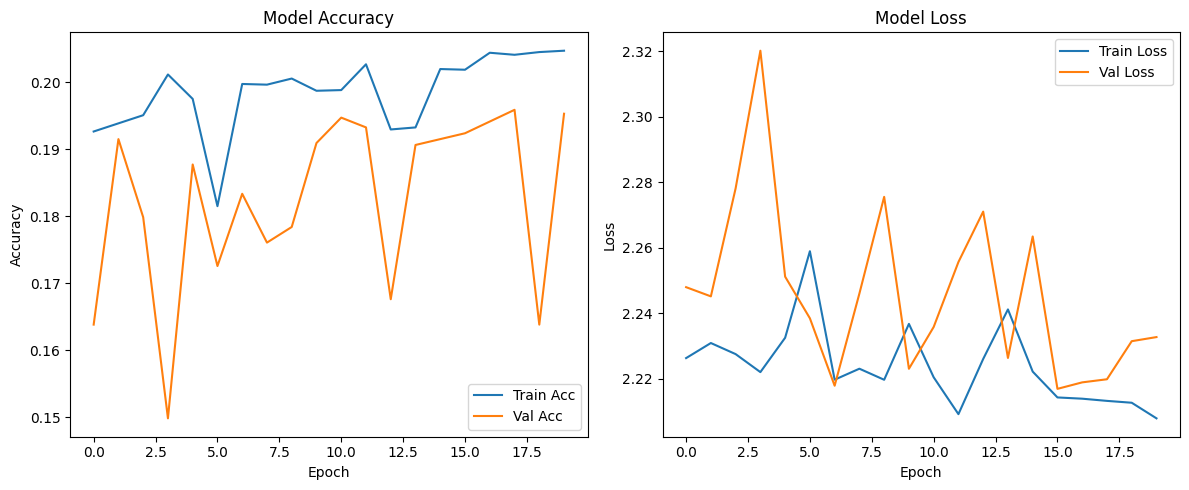

In [9]:
# 🚀 Step 7 (FIXED): Plot Accuracy & Loss
import matplotlib.pyplot as plt  # ← Make sure this is included

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
